In [1]:
echo -e '\nexport LANG="en_US.UTF-8"\n' >> ~/.bashrc
source ~/.bashrc

In [2]:
who

In [3]:
top

TERM environment variable not set.


: 1

In [4]:
sinfo #current workload on the compute nodes

PARTITION AVAIL  TIMELIMIT  NODES  STATE NODELIST
fast*        up 1-00:00:00      1  comp* cpu-node-24
fast*        up 1-00:00:00      2  down* cpu-node-[77,80]
fast*        up 1-00:00:00      4   drng cpu-node-[31,37-39]
fast*        up 1-00:00:00      7  drain cpu-node-[2,10,18,25,27-28,35]
fast*        up 1-00:00:00     41    mix cpu-node-[3-9,11-17,19-23,26,29-30,34,36,40-41,43-47,49-53,72-74,78-79]
fast*        up 1-00:00:00      5  alloc cpu-node-[1,33,42,48,82]
fast*        up 1-00:00:00     16   idle cpu-node-[54-67,75-76]
long         up 30-00:00:0      1  comp* cpu-node-24
long         up 30-00:00:0      4   drng cpu-node-[31,37-39]
long         up 30-00:00:0      6  drain cpu-node-[10,18,25,27-28,35]
long         up 30-00:00:0     26    mix cpu-node-[11-17,19-23,26,29-30,34,36,40-41,43-47,49-50]
long         up 30-00:00:0      3  alloc cpu-node-[33,42,48]
bigmem       up 60-00:00:0      1    mix cpu-node-69
docker       up   12:00:00      1   idle cpu-node-83
gpu          up

In [5]:
sacct  --format=JobID,JobName%20,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsed,MaxRSS,NodeList,Account%15 -S 2022-05-10

       JobID              JobName  ReqCPUS     ReqMem  Timelimit      State ExitCode               Start    Elapsed     MaxRSS        NodeList         Account 
------------ -------------------- -------- ---------- ---------- ---------- -------- ------------------- ---------- ---------- --------------- --------------- 
22953960                  jupyter        1        1Gn   12:00:00    TIMEOUT      0:0 2022-05-27T15:38:00   06:02:01                cpu-node-29            demo 
22953960.ba+                batch        1        1Gn            OUT_OF_ME+    0:125 2022-05-27T15:38:00   06:02:02      7832K     cpu-node-29            demo 
22953960.0   batchspawner-single+        1        1Gn            OUT_OF_ME+    0:125 2022-05-27T15:38:01   06:02:14    410344K     cpu-node-29            demo 
23260504                  jupyter        1        1Gn   12:00:00 CANCELLED+      0:0 2022-06-11T14:23:17   00:00:00              None assigned            demo 
23260508                  jupyter       

In [7]:
squeue -u zliu

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          23263664      fast  jupyter     zliu  R    2:38:24      1 cpu-node-1


In [8]:
srun tar cfz refseq_viral.tar.gz /shared/bank/refseq/refseq_202/fasta/viral.* &

[1] 42547


In [10]:
sacct  --format=JobID,JobName%20,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsed,MaxRSS,NodeList,Account%15 -S 2022-05-10

srun: Job 23263664 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Job 23263664 step creation still disabled, retrying (Requested nodes are busy)
       JobID              JobName  ReqCPUS     ReqMem  Timelimit      State ExitCode               Start    Elapsed     MaxRSS        NodeList         Account 
------------ -------------------- -------- ---------- ---------- ---------- -------- ------------------- ---------- ---------- --------------- --------------- 
22953960                  jupyter        1        1Gn   12:00:00    TIMEOUT      0:0 2022-05-27T15:38:00   06:02:01                cpu-node-29            demo 
22953960.ba+                batch        1        1Gn            OUT_OF_ME+    0:125 2022-05-27T15:38:00   06:02:02      7832K     cpu-node-29            demo 
22953960.0   batchspawner-single+        1        1Gn            OUT_OF_ME+    0:125 2022-05-27T15:38:01   06:02:14    410344K     cpu-node-29            demo 
23260504                

In [11]:
run --cpus-per-task ??? --mem-per-cpu ???MB --time 00:??:00 tar cfz refseq_viral.tar.gz /shared/bank/refseq/refseq_202/fasta/viral.* &

srun: Job 23263664 step creation still disabled, retrying (Requested nodes are busy)
[2] 45143


: 1

In [14]:
status_bars

bash: status_bars: command not found


: 127

In [1]:
cd /shared/projects/form_2022_19

In [2]:
ls

artyom	felicia  jiacheng  kraken2  maria    name-list	refseq	 xiya
Binbin	foobar	 john	   leo	    martin   osheen	Sofia	 yuying
carlos	hong	 jose	   Loic     mengnan  pascal	violeta  ziwei


In [3]:
cd ziwei

In [6]:
ls

Apply-bioinfo  exercise1  README.md  SQLite_exercise.ipynb


## Git workflow strategy for working in the comon project directory

Clone a branch called initial_state of the git repo located on the IFB's file system in the MedBioinfo project.
It is the usual git clone command just replacing the URL used for distant repos such as GitHub by the absolute path of the shared file system repofolder 

 Create and check out a new git branch and name after my name 

In [8]:
git branch ziwei 


In [9]:
git checkout ziwei

Switched to branch 'ziwei'


To resgister your new branch in the upstream shared repo, execute:

git push --set-upstream origin ziwei

git status

1. After this initial special push --set-upstream, just a simple push will suffice in future to synchronise the origin shared repo with your local working commits.

2. Later on you will modify and create files in your local working directory and use the classical git add both to add any new files of interest that you create and to stage modified files before committing, then commit in your local repo relevant versions of your files, and then a simple push will send your commits back into the upstream origin repo.

3. Remember to git status regularly to keep an eye on what is tracked or not, what has been modified, what is staged, how many commits you are ahead of the upstream origin repo etc

4. Occasionally check if any new commits in the origin upstream shared repo need to be integrated into your own local branch (either fetch and then merge, or just pull if you don't feel the need to eye ball the changes before merging)

5. Carefully choose file names for new files: since we are all collaborating on the very same sars2copath origin repo, some times we will choose a common generic file name if we are all working in this same file (eg README.md), but some times we will want to individualise file names (eg scripts/kraken2_sbatch_pascal.sh or analyses/kraken2_output_pascal.csv) for distinct files that should remain independent, ie should not be merged into single files (hence distinct filenames)

In [12]:
cd sars2copath

In [13]:
ls

analyses  data	docs  README.md  scripts


In [16]:
cat README.md

# MedBioinfo 2022 Applied Bioinformatics
## Shared git repo for re-analysis

### Data source

Data is from Daniel Castañeda-Mogollón et al. Dec 2021 https://www.sciencedirect.com/science/article/pii/S1386653221002924

Samples (either Nasopharyngeal or Throat swabs) from 125 patients, either COVID+ or COVID- by RT-PCR, were subjected to Illumina sequencing (one RNA and one DNA sequencing run for each patient).

### Aim of the re-analysis

Use k-mer based binning of the raw reads to identify potential human pathogens in the samples (including SARS-CoV-2).

To investigate, amongst others: 
 - correlation between COVID+/- PCR status and SARS sequence presence in metatranscriptomes
 - correlation between SARS2 infection and presence of known viral/bacterial co-pathogens
 - effectiveness of SARS2 detection with regards swab type (Nasopharyngeal or Throat)

Each course participant is in charge of a subset of the 250 total samples sequenced. Results will then be compiled to allow overall analy

In [18]:
cat data/SraRunTable.csv

bash: syntax error near unexpected token `('


: 2

To avoid having to select your preferred SQLite display mode each time you start a SQLite session, I recommend you run this bash command (or modify to suit your taste) once and for all:

In [19]:
echo -e '.mode column\n.headers on\n' > ~/.sqliterc

In [20]:
sqlite3 -batch ./analyses/sample_collab.db "select * from sample_annot limit 20;"

run_accession  host_subject_id    patient_code  nuc  host_body_site  host_disease_status  miscellaneous_parameter     Ct     total_reads  read_count  base_count
-------------  -----------------  ------------  ---  --------------  -------------------  --------------------------  -----  -----------  ----------  ----------
ERR6913102     P011_DNA_S39_L001  P11           DNA  Nasopharyngeal  SARS-CoV-2 positive  Symptomatic-DNA-sequenced   23.59  27630988     102524      13193813  
ERR6913103     P019_DNA_S74_L001  P19           DNA  Nasopharyngeal  SARS-CoV-2 positive  Symptomatic-DNA-sequenced   18.81  21364260     385740      49060845  
ERR6913108     P069_DNA_S27_L001  P69           DNA  Nasopharyngeal  SARS-CoV-2 positive  Symptomatic-DNA-sequenced   18.42  23356096     226280      29240147  
ERR6913111     P090_DNA_S25_L001  P90           DNA  Nasopharyngeal  SARS-CoV-2 positive  Symptomatic-DNA-sequenced   26.98  27646936     33240       4397612   
ERR6913115     P267_DNA_S9_L001   

Switch over to bash commands

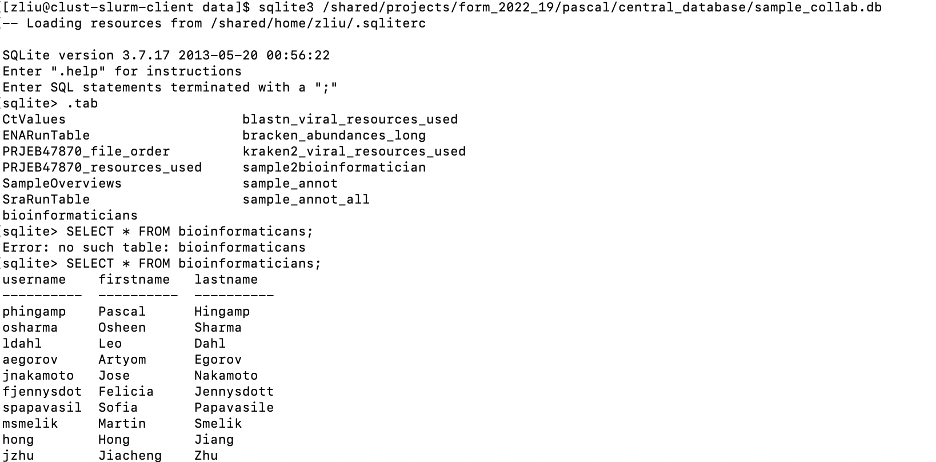

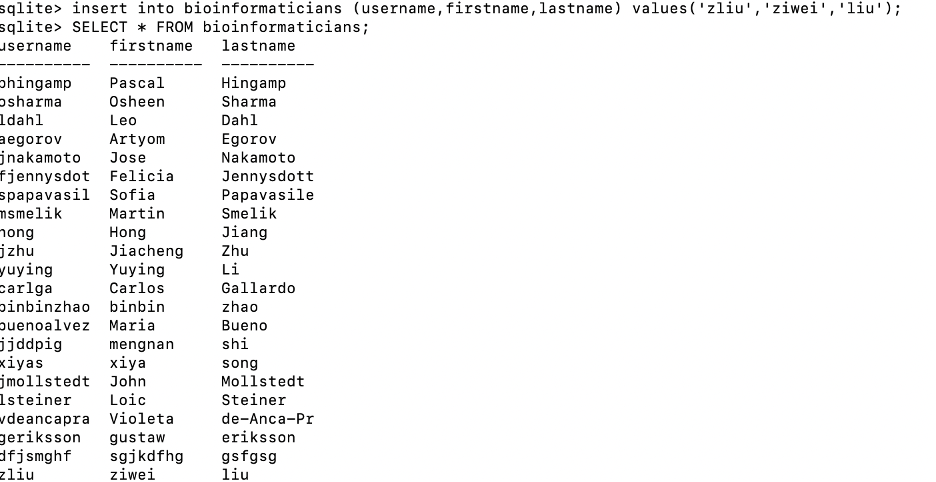

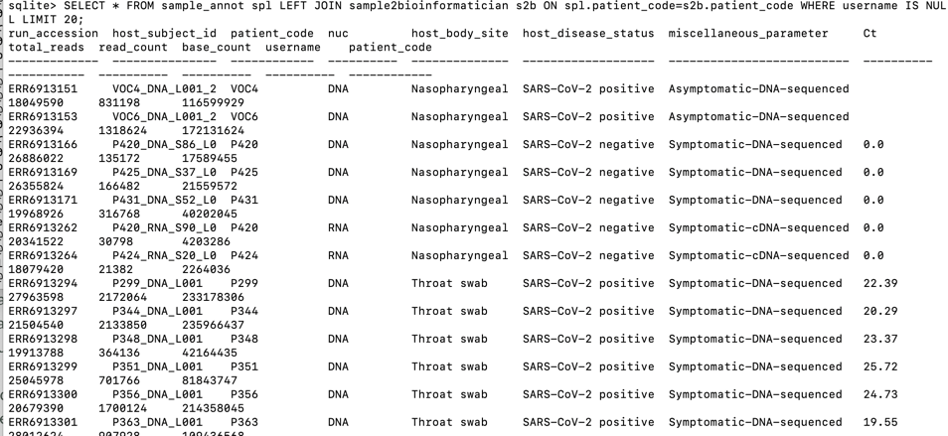

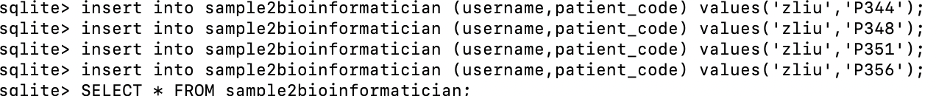

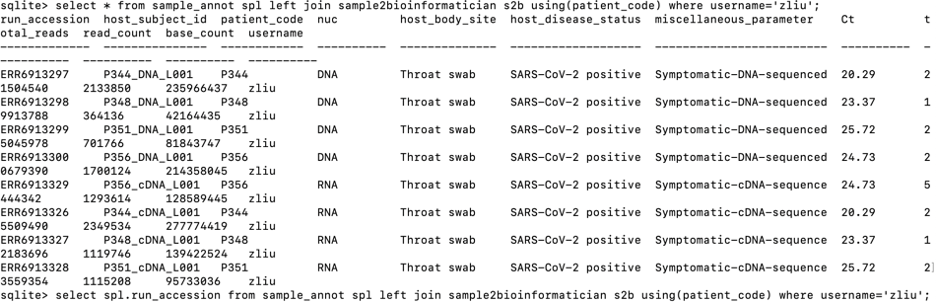